In [358]:
import pandas as pd
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

## 1.3

Проведите преобразование категориального признака ocean_proximity через OneHot или Dummy-кодировку

In [359]:
    housing = pd.read_csv('./housing.csv')
    housing_dummies = pd.get_dummies(housing,columns = ['ocean_proximity'], prefix_sep="__")
    housing_dummies

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity__<1H OCEAN,ocean_proximity__INLAND,ocean_proximity__ISLAND,ocean_proximity__NEAR BAY,ocean_proximity__NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


Замените признаки total_rooms и total_bedrooms на average_rooms и average_bedrooms (поделив на households).

In [360]:
housing_dummies['average_rooms'] = housing_dummies['total_rooms'] / housing_dummies['households']
housing_dummies['average_bedrooms'] = housing_dummies['total_bedrooms'] / housing_dummies['households']
housing_dummies = housing_dummies.drop(['total_rooms','total_bedrooms'], axis=1)

В признаке average_bedrooms (total_bedrooms) есть отсутствующие значения. Определите число экземпляров данных, для которых этот признак отсутствует. Придумайте и обоснуйте стратегию заполнения пропусков в этой задаче.

In [361]:
housing_dummies_dropna = housing_dummies.dropna(axis=0)
housing_dummies_dropna = housing_dummies.dropna(axis=0).drop('median_house_value',axis=1)

housing_train_dummies_dropna, housing_test_dummies_dropna =  train_test_split( housing_dummies_dropna, test_size =0.2)

X_for_train = housing_train_dummies_dropna.drop('average_bedrooms',axis=1)
Y_for_train = housing_train_dummies_dropna['average_bedrooms']

X_for_test = housing_test_dummies_dropna.drop('average_bedrooms',axis=1)
Y_for_test = housing_test_dummies_dropna['average_bedrooms']

regression = LinearRegression()
regression.fit(X_for_train, Y_for_train)

housing_dummies_null = housing_dummies['average_bedrooms'].isnull()

predict = regression.predict(housing_dummies.loc[housing_dummies_null].drop('average_bedrooms',axis=1).drop('median_house_value',axis=1))
housing_dummies.loc[housing_dummies_null, 'average_bedrooms' ] = predict



Нормализуйте признаки longitude и latitude (сделайте так, чтобы каждый признак имел среднее значение 0 и дисперсию 1 внутри обучающей выборки)

In [362]:
housing_train_val, housing_test =  train_test_split( housing_dummies, test_size =0.1)
housing_train, housing_val =  train_test_split( housing_train_val, test_size =0.1)

In [363]:
scaler_long = preprocessing.StandardScaler().fit(housing_train[['longitude']])
scaler_lat = preprocessing.StandardScaler().fit(housing_train[['latitude']])

In [364]:

housing_train['longitude'] = scaler_long.transform(housing_train[['longitude']]).reshape(-1)
housing_train['latitude'] = scaler_lat.transform(housing_train[['latitude']]).reshape(-1)

housing_test['longitude'] = scaler_long.transform(housing_test[['longitude']]).reshape(-1)
housing_test['latitude'] = scaler_lat.transform(housing_test[['latitude']]).reshape(-1)

housing_val['longitude'] = scaler_long.transform(housing_val[['longitude']]).reshape(-1)
housing_val['latitude'] = scaler_lat.transform(housing_val[['latitude']]).reshape(-1)



## 2.2

In [365]:
    ccpp = pd.read_excel('./Folds5x2_pp.xlsx',sheet_name= "Sheet1")
    ccpp

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


Возьмите данные с листа 1 и выделите валидационную и тестовую выборку.

In [366]:
ccpp_train_val, ccpp_test = train_test_split(ccpp, test_size=0.1)
ccpp_train, ccpp_val = train_test_split(ccpp_train_val, test_size=0.1)


Постройте регрессионную модель. Замерьте коэффициент и среднюю ошибку предсказания на валидационной выборке.

In [367]:
model = LinearRegression()
X_train = ccpp_train.drop("PE",axis=1)
Y_train = ccpp_train['PE']
model.fit(X_train, Y_train)

X_val = ccpp_val.drop("PE",axis=1)
predictions = model.predict(X_val)

r2_score = r2_score(ccpp_val['PE'], predictions)
mean_absolute_error = mean_absolute_error(ccpp_val['PE'], predictions)

print(f'mean_absolute_error : {mean_absolute_error}')
print(f'r2_score : {r2_score}')

mean_absolute_error : 3.8076857258115124
r2_score : 0.9147526979513335


Постройте точки из валидационной выборки на плоскости (t=истинное значение, y=предсказание модели). Отобразите вместе с ними прямую y=t.

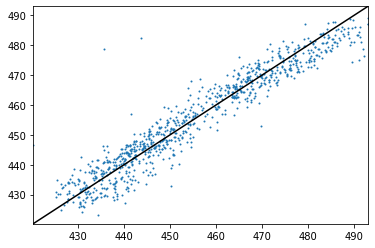

In [368]:
ax = plt.gca()
ax.cla()
ax.set_xlim((ccpp_val['PE'].min(), ccpp_val['PE'].max()))
ax.set_ylim((ccpp_val['PE'].min(), ccpp_val['PE'].max()))

plt.scatter(ccpp_val['PE'], predictions, s = 1)
plt.plot(np.linspace(ccpp_val['PE'].min(),ccpp_val['PE'].max()),
         np.linspace(ccpp_val['PE'].min(),ccpp_val['PE'].max()), c = 'black')

## 2.1

Удалите некорректные данные

In [369]:
davis = pd.read_csv('./Davis.csv')

davis.dropna(axis=0, inplace=True)
davis.drop('Unnamed: 0', axis=1, inplace=True)
davis = davis.loc[davis['weight'] > 40]
davis = davis.loc[davis['height'] > 120]

Выделите тестовую выборку из 50 экземпляров

In [370]:
davis_train, davis_test = train_test_split(davis, train_size = 50, stratify = davis['sex'])

На тренировочных данных постройте: Гистограмму height Гистограмму weight Эти же гистограммы для разных полов


<AxesSubplot:xlabel='weight', ylabel='Count'>

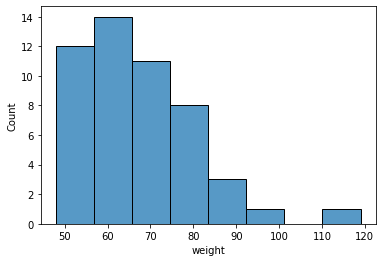

In [371]:
sns.histplot(davis_train['weight'])


<AxesSubplot:xlabel='height', ylabel='Count'>

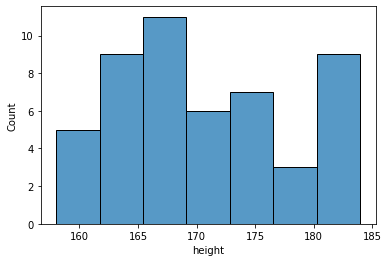

In [372]:
sns.histplot(davis_train['height'])

<AxesSubplot:xlabel='weight', ylabel='Count'>

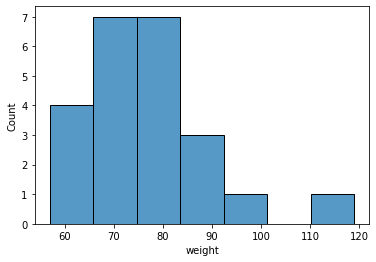

In [373]:
sns.histplot(davis_train[davis_train['sex'] =='M']['weight'])

<AxesSubplot:xlabel='height', ylabel='Count'>

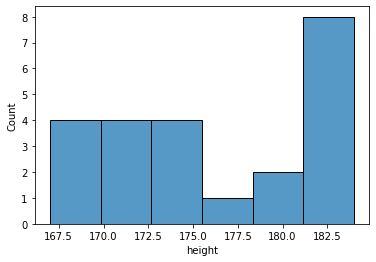

In [374]:
sns.histplot(davis_train[davis_train['sex'] =='M']['height'])

<AxesSubplot:xlabel='weight', ylabel='Count'>

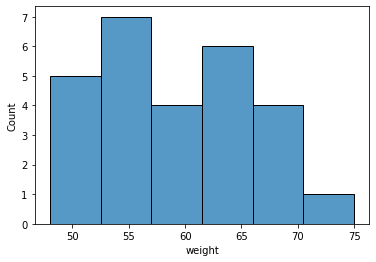

In [375]:
sns.histplot(davis_train[davis_train['sex'] =='F']['weight'])


<AxesSubplot:xlabel='height', ylabel='Count'>

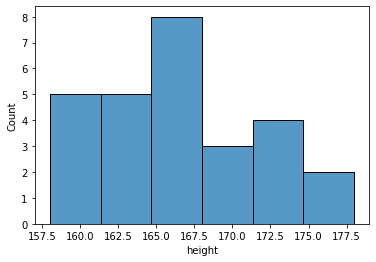

In [376]:
sns.histplot(davis_train[davis_train['sex'] =='F']['height'])

На тренировочных данных обучите классификатор пола (sex), используя только признаки height и weight. Замерьте производительность на тренировочной и тестовой выборке (через Accuracy). Рекомендуемые модели:  логистическая регрессия, quadratic discriminant analysis.

In [377]:
davis_train.replace({'M': 1, 'F': 0}, inplace=True)
davis_test.replace({'M': 1, 'F': 0}, inplace=True)

In [378]:
model = QuadraticDiscriminantAnalysis()

In [379]:
x_train = davis_train[['height','weight']]
y_train = davis_train['sex']
model.fit(x_train, y_train)

QuadraticDiscriminantAnalysis()

In [380]:
x_test = davis_test[['height','weight']]
y_test = davis_test['sex']
predict = model.predict(x_test)

accuracy = accuracy_score(predict, y_test)
accuracy

0.9224806201550387

Отобразите точки из обучающей выборки на плоскости (height-weight). Покрасьте их цветами в зависимости от пола. Раскрасьте области в зависимости от пола, 

In [381]:
x1_min, x1_max = x_train['weight'].min()-0.5, x_train['weight'].max()+0.5
x2_min, x2_max = x_train['height'].min()-0.5, x_train['height'].max()+0.5
xx1,xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]
X_pred = np.column_stack([xx2.reshape(-1),xx1.reshape(-1) ])
Y_pred = model.predict(X_pred)

c:\users\виталик\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


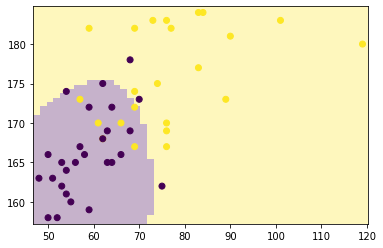

In [382]:
plt.pcolormesh(xx1,xx2, Y_pred.reshape(xx1.shape), alpha=0.3, shading='auto')
plt.scatter(x_train['weight'], x_train['height'], c = y_train)

In [383]:
x1_min, x1_max = x_test['weight'].min()-0.5, x_test['weight'].max()+0.5
x2_min, x2_max = x_test['height'].min()-0.5, x_test['height'].max()+0.5
xx1,xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]
X_pred = np.column_stack([xx2.reshape(-1),xx1.reshape(-1) ])
y_pred = model.predict(X_pred)

c:\users\виталик\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


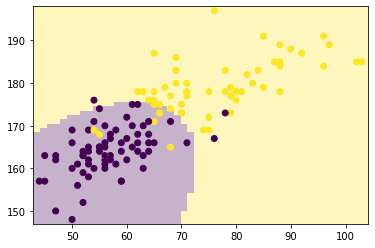

In [384]:
plt.pcolormesh(xx1,xx2, y_pred.reshape(xx1.shape), alpha=0.3, shading='auto')
plt.scatter(x_test['weight'], x_test['height'], c = y_test)